<a href="https://colab.research.google.com/github/yangtianchangxiao/Dissertation-project-in-Bristol/blob/main/cat_swarm_optimization_with_potential_filed_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [701]:
import numpy as np
import matplotlib.pyplot as plt

Initiate SMP.CDC.SRD and SPC

In [702]:
# Seeking mode set
SMP = 8 # 10 copies of cat 
CDC = 0.5 # Half dimension will change.
SRD = 1 # Change rate is 10%
SPC = True 
SPC_ratio = 0.1
seeking_group = 20
coordinate_dimension = 2
best_cat_x = 0
best_cat_y = 0

# Environment Initial
def f(x1,x2): 
   return 3*x1**2-2.1*x1**4+(x1**6)/3+x1*x2-4*x2**2+4*x2**4
#Generate searching area
area_width = 15
area_height = 13
area = [0,area_width,0,area_height]
x=np.linspace(area[0],area[1],200)
y=np.linspace(area[2],area[3],200)
X,Y= np.meshgrid(x,y)
Fitness = f(X,Y)

#ax3 = plt.axes(projection='3d')
#ax3.plot_surface(X,Y,Fitness,cmap='rainbow')
#area_size = (area[1]-area[0])*(area[3]-area[2])
#print(type(Fitness))
#print("max(Fitness)", np.max(Fitness))

#print(f(1,1.133867299686855))
#tracing


tracing_group_size = 6
iteration = 100
accuracy = 0.0001

max_tracing_velocity = min(area[1]-area[0],area[3]-area[2])/40
tracing_velocity = np.zeros((coordinate_dimension,tracing_group_size))
tracing_position = np.zeros((coordinate_dimension,tracing_group_size))
c = 1.5


In [703]:
xita = 0.5
distance = 0
detect_targets = False
ap = 10
av = 0
m = 2
n = 1.2
v = 0 # velocity
v_last = 0
v_last = 0
a = 0.1 # acceleration
v_target = 0


detection_range = 4

In [704]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
area_width = 15
area_height = 13
block_num = 5
max_block_width = 1
max_block_height = 1
block_parameters=np.zeros((6,block_num))
influence_gain = 1.2 # Set danger area around a block. If a block is 1.3*1.4 size with a center (2.3,2.4),
            # then the danger area is (1.2*1.3)*(1.2*1.4) size with the same center (2.3,2.4).
influence_range = 0.5 # distance to the block
block_influence_range_parameters=np.zeros((6,block_num))
targets_num = 1
targets_location = np.zeros((2,targets_num))
fig = plt.figure()
def generate_block():
  global block_parameters, block_influence_range
  for i in range(block_num):
    #initiate x and y coordinates of block_cneter 
    block_parameters[0][i] = np.random.random()*(area_width - max_block_width) # 这种生成block center 的方法有一个缺点，就是block center 生成区域范围缩小了，本来应该是整个area, 
                                    #可以改成整个区域，然后对block center + x/y interval施加约束，使其不超过整个区域
    block_parameters[1][i] = np.random.random()*(area_height - max_block_height)
    block_influence_range_parameters[0][i] = block_parameters[0][i]
    block_influence_range_parameters[1][i] = block_parameters[1][i]

    x_interval = np.random.random()*max_block_width # Set x interval of left and right boundary from block center
    for j in range(2,4): # x interval of left and right boundary from block center
      block_parameters[j][i] = x_interval
      #block_influence_range_parameters[j][i] = influence_gain*block_parameters[j][i]
      block_influence_range_parameters[j][i] = influence_range/2 + block_parameters[j][i]
      
    y_interval = np.random.random()*max_block_height # Set y coordinates of up and down boundary from block center
    for j in range(4,6): # y coordinates of up and down boundary from block center
      block_parameters[j][i] = y_interval
      #block_influence_range_parameters[j][i] = influence_gain*block_parameters[j][i]
      block_influence_range_parameters[j][i] = influence_range/2 + block_parameters[j][i]
      #print(block_parameters[j][i])
    
  #print(block_parameters)
  return(block_parameters)
def plot_block(parameters):
  global fig
  for i in range(block_num):
    x = [parameters[0][i]-parameters[2][i], parameters[0][i]+parameters[3][i]] #coordiantes of left and right boundary of blocks
    y = [parameters[1][i]-parameters[4][i], parameters[1][i]+parameters[5][i]] #coordiantes of down and up boundary of blocks
    coordinates = [(x[0],y[0]),#left bottom
    (x[0],y[1]),#left top
    (x[1],y[1]),#right top 
    (x[1],y[0]),#right bottom
    (x[0],y[0])# ignored
    ]
    codes = [Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,]
    path = Path(coordinates, codes)
    patch = patches.PathPatch(path, facecolor='orange', lw=2)
    ax = fig.add_subplot(111)
    ax.axis('equal')
    ax.add_patch(patch)

def plot_danger_area(parameters):
  global fig
  for i in range(block_num):
    x = [parameters[0][i]-parameters[2][i], parameters[0][i]+parameters[3][i]] #coordiantes of left and right boundary of blocks
    y = [parameters[1][i]-parameters[4][i], parameters[1][i]+parameters[5][i]] #coordiantes of down and up boundary of blocks
    coordinates = [(x[0],y[0]),#left bottom
    (x[0],y[1]),#left top
    (x[1],y[1]),#right top 
    (x[1],y[0]),#right bottom
    (x[0],y[0])# ignored
    ]
    codes = [Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,]
    path = Path(coordinates, codes)
    patch = patches.PathPatch(path, color = None,facecolor = 'None', linestyle ='-', lw=2)
    ax = fig.add_subplot(111)
    ax.axis('equal')
    ax.add_patch(patch)

def initiate_targets():
  global targets_num, targets_location, fig
  regenate_time = 1
  for i in range(targets_num):
    targets_location[0][i] = np.random.random()*area_width
    targets_location[1][i] = np.random.random()*area_height
    while True:
      for j in range(block_num): # If targets are covoerd by blocks, then we should regerate targets
        x = [block_parameters[0][i]-block_parameters[2][i], block_parameters[0][i]+block_parameters[3][i]] #coordiantes of left and right boundary of blocks
        y = [block_parameters[1][i]-block_parameters[4][i], block_parameters[1][i]+block_parameters[5][i]] #coordiantes of down and up boundary of blocks
        if (x[0]<targets_location[0][i]<x[1] and y[0]<targets_location[1][i]<y[1]): # If targets are coverd by blocks,
          print("Targts",j,"is coverd by blocks",regenate_time,"times")
          regenate_time = regenate_time + 1
          targets_location[0][i] = np.random.random()*area_width   
          targets_location[1][i] = np.random.random()*area_height
          break # end 'for ' loop and test whether targets are covered by blockd or not, again.
      if j == block_num-1:
        break
    #plt.plot(targets_location[0][i],targets_location[1][i],'>')



<Figure size 432x288 with 0 Axes>

In [705]:
def distance_to_block(p_x,p_y):
  distance_list = []
  for i in range(block_num):
    x = [block_parameters[0][i]-block_parameters[2][i], block_parameters[0][i]+block_parameters[3][i]] #coordiantes of left and right boundary of blocks
    y = [block_parameters[1][i]-block_parameters[4][i], block_parameters[1][i]+block_parameters[5][i]] #coordiantes of down and up boundary of blocks
    danger_x = [block_influence_range_parameters[1][i]-block_influence_range_parameters[4][i], block_influence_range_parameters[1][i]+block_influence_range_parameters[5][i]]
    danger_y = [block_influence_range_parameters[1][i]-block_influence_range_parameters[4][i], block_influence_range_parameters[1][i]+block_influence_range_parameters[5][i]]
    if x[0]<p_x<x[1]:
      distance_list.append(min(abs(p_y-y[0]),abs(p_y-y[1])))
    elif y[0]<p_y<y[1]:
      distance_list.append(min(abs(p_x-x[0]),abs(p_x-x[1])))
    else:
      distance_list.append(min(p_p_distance(p_x,p_y,x[0],y[0]),p_p_distance(p_x,p_y,x[0],y[1]),p_p_distance(p_x,p_y,x[1],y[0]),p_p_distance(p_x,p_y,x[1],y[1])))
  return min(distance_list)
def p_p_distance(p_x,p_y,x,y):
  return np.sqrt((p_x-x)**2+(p_y-y)**2)


def potential_field(p_x,p_y,last_p_x,last_p_y):
  global v_last, detect_targets
  # global targets_num robots_num

  detect_obstacles = False
  distance_to_tragets = []
  ## 策略一 找到 target 后，不改变 robot 的 target，即使中间遇到更近的

  ## 疑惑 cat copy 在实际中代表什么呢
  for i in range (targets_num):
    a = p_p_distance(last_p_x,last_p_y,targets_location[0][i],targets_location[1][i])
    if a < detection_range:
      detect_targets = True
      #print("Find the target !!!!!!")
      break
  v = p_p_distance(last_p_x,last_p_y,targets_location[0][i],targets_location[1][i])
  a = v - v_last
  v_last = v
  #if distance_to_block(p_x,p_y)-v*v/2/a < influence_range:
  if distance_to_block(p_x,p_y) < influence_range:
    #U_repulsive = xita * (1/(distance_to_block(p_x,p_y)-v*v/2/a)-1/influence_range)
    U_repulsive = xita * (1/(distance_to_block(p_x,p_y))-1/influence_range)
    #print('U_repulsive',U_repulsive)
  else:
    U_repulsive = 0
    #print('U_repulsive',U_repulsive)
    detect_obstacles = True
  if detect_targets == False: #Searching state
    # 假设知道更新后的 cat 与 blocks 的相对位置
    U_attractive = -1 * ap * p_p_distance(p_x,p_y,last_p_x,last_p_y) ** m
    #print('U_attractive',U_attractive)
  else: #Hunting state
    U_attractive = ap * p_p_distance(p_x,p_y,targets_location[0][i],targets_location[1][i]) ** m + av * abs(v_target - v)
    #print('U_attractive',U_attractive)
  f_attractive =   U_attractive + U_repulsive 
  
  return f_attractive


In [706]:
# initate cats
def initiate_cats(group_size,parameters):
  global block_num
  
  group=np.zeros((coordinate_dimension,group_size))
  #print(np.shape(group))
  for i in range(group_size):
    x_cat=np.random.uniform(area[0],area[1])
    y_cat=np.random.uniform(area[2],area[3])
    j = 0
    while j < block_num:
      x_block = [parameters[0][j]-parameters[2][j], parameters[0][j]+parameters[3][j]] #coordiantes of left and right boundary of blocks
      y_block = [parameters[1][j]-parameters[4][j], parameters[1][j]+parameters[5][j]] #coordiantes of down and up boundary of blocks
      if x_block[0]<x_cat<x_block[1] and y_block[0]<y_cat<y_block[1]:
        x_cat=np.random.uniform(area[0],area[1])
        y_cat=np.random.uniform(area[2],area[3])
        j = 0
      else:
        j = j + 1
        
    group[0][i]=x_cat
    group[1][i]=y_cat
  #print("shape of group",np.shape(group))
  return group


In [707]:
# seeking function

def generate_candidate (P,parameters):
  array_shape = np.shape(P)
  array_column = array_shape[1]
  array_row = array_shape[0]
  candidate_group = np.zeros((seeking_group,SMP,1,array_row))
  area_range = [area[1]-area[0],area[3]-area[2]]
  # initial candicates
  for column in range(seeking_group):
    if(np.random.random()>SPC_ratio):
      candidates_num = SMP - 1
      for i in range(candidates_num):
        CDC_array_init = np.random.randn(2)/50
        # if note next two lines below, then the CDC is 0 and both dimensions change in seeking mode
        #a = np.ndarray.tolist(CDC_array_init)
        #CDC_array_init[a.index(np.min(a))]=np.min(a)
        CDC_array = round(np.random.random(),2)* np.random.choice((-1, 1))* CDC_array_init.reshape(1,array_row)
        #print(P[:,column]+CDC_array*np.max(a))
        
        candidate_group[column][i] = P[:,column]+CDC_array * area_range #*np.max(a)
        # constraint on positions
       
        block_count = 0
        #print(block_num,'is block_num')
        while block_count < block_num:

          if candidate_group[column][i][0][0] > area[1]:
            candidate_group[column][i][0][0] = area[1]
          if candidate_group[column][i][0][0] < area[0]:
            candidate_group[column][i][0][0] = area[0]
          if candidate_group[column][i][0][1] > area[3]:
            candidate_group[column][i][0][1] = area[3]
          if candidate_group[column][i][0][1] < area[2]:
            candidate_group[column][i][0][1] = area[2]

          x_block = [parameters[0][block_count]-parameters[2][block_count], parameters[0][block_count]+parameters[3][block_count]] #coordiantes of left and right boundary of blocks
          y_block = [parameters[1][block_count]-parameters[4][block_count], parameters[1][block_count]+parameters[5][block_count]] #coordiantes of down and up boundary of blocks
          if x_block[0] < candidate_group[column][i][0][0] <x_block[1] and y_block[0] < candidate_group[column][i][0][1] <y_block[1]:
            CDC_array_init = np.random.randn(2)/20
            CDC_array = round(np.random.random(),2)* np.random.choice((-1, 1))* CDC_array_init.reshape(1,array_row)
            candidate_group[column][i] = P[:,column]+CDC_array * area_range #*np.max(a)
            block_count = 0
          else:
            block_count = block_count + 1
          #print('block_count is ',block_count)
      candidate_group[column][SMP-1] = P[:,column]
    else:
      candidates_num = SMP
      for i in range(candidates_num):
        CDC_array_init = np.random.randn(2)/5
        #a = np.ndarray.tolist(CDC_array_init)
        #CDC_array_init[a.index(np.min(a))]=0
        #CDC_array = round(np.random.random(),2)*CDC_array_init.reshape(1,array_row)
        CDC_array = round(np.random.random(),2)* np.random.choice((-1, 1))* CDC_array_init.reshape(1,array_row)
        #print(P[:,column]+CDC_array*np.max(a))
        candidate_group[column][i] = P[:,column]+CDC_array * area_range #*np.max(a)
        block_count = 0
        #print(block_num,'is block_num')
        while block_count < block_num:

          # constraint on positions
          if candidate_group[column][i][0][0] > area[1]:
            candidate_group[column][i][0][0] = area[1]
          if candidate_group[column][i][0][0] < area[0]:
            candidate_group[column][i][0][0] = area[0]
          if candidate_group[column][i][0][1] > area[3]:
            candidate_group[column][i][0][1] = area[3]
          if candidate_group[column][i][0][1] < area[2]:
            candidate_group[column][i][0][1] = area[2]

          x_block = [parameters[0][block_count]-parameters[2][block_count], parameters[0][block_count]+parameters[3][block_count]] #coordiantes of left and right boundary of blocks
          y_block = [parameters[1][block_count]-parameters[4][block_count], parameters[1][block_count]+parameters[5][block_count]] #coordiantes of down and up boundary of blocks
          if x_block[0] < candidate_group[column][i][0][0] <x_block[1] and y_block[0] < candidate_group[column][i][0][1] <y_block[1]:
            CDC_array_init = np.random.randn(2)/5
            CDC_array = round(np.random.random(),2)* np.random.choice((-1, 1))* CDC_array_init.reshape(1,array_row)
            candidate_group[column][i] = P[:,column]+CDC_array * area_range #*np.max(a) 
            block_count = 0
          else:
            block_count = block_count + 1 
          #print('block_count is ',block_count)       
  #print("candidate_group shape",np.shape(candidate_group))
  return candidate_group


In [708]:
max_value = -100
last_max_value = -100
min_value = 100000
def evaluate(group,original_group):
  print("Start evaluating")
  global min_value
  global best_cat_x, best_cat_y, individual_best_x, individual_best_y
  index_list=[]
  value_list=[]
  max_value_list = []
  min_value_list = []
  for cat in range(seeking_group):
    #max_value = -100
    candidate_index = 0
    #min_value = 100
    for copy in range(SMP):
      min_value = 10000
      candidate_value=potential_field(group[cat][copy][0][0],group[cat][copy][0][1],original_group[0][cat],original_group[1][cat])
      value_list.append(candidate_value)
      #print(candidate_value)
      if(candidate_value < min_value):
        min_value = candidate_value
        individual_best_x = best_cat_x = group[cat][copy][0][0]
        individual_best_y = best_cat_y = group[cat][copy][0][1]


    
    max_value_list = max(value_list)
    min_value_list = min(value_list)
    #print('value_list',value_list)
    #print('min_value_list',)
    for copy in range(SMP):
      value_list[copy] = abs(value_list[copy] - max_value_list) / (max_value_list - min_value_list)
    for copy in range(SMP):
      if copy > 0:
        value_list[copy] = value_list[copy]+value_list[copy-1]
    #print('value_list',value_list)
    selected_value = np.random.uniform(value_list[copy],0)
    #print('selected_value',selected_value)
    value_list.append(selected_value)
    value_list.sort()
    candidate_index = value_list.index(selected_value)
    #print(candidate_index)
    index_list.append(candidate_index)
    #print("max_value is",max_value)
    value_list = []
  #print("index_list",index_list)
  #print("best_cat_x",best_cat_x)
  #print("best_cat_y",best_cat_y)
  #print("max_value in evaluate", max_value)
  print('best cat is in',best_cat_x,best_cat_y)
  print(min_value, 'is min_value')
  return index_list



In [709]:
def next_group(original_group,candidate_group,index):
  array_shape = np.shape(original_group)
  array_column = array_shape[1]
  array_row = array_shape[0]
  new_group=np.zeros((array_row,array_column))
  #print(np.shape(new_group))
  #print(np.shape(candidate_group))
  #print('index',index)
  #print('index[1:15]',index[1:15])
  for i in range(array_column):
    for j in range(array_row):
      new_group[j][i] = candidate_group[i][index[i]][0][j]
  return new_group


In [710]:
#seeking mode initiation

def tracing_velocity_initiate(group):
  for i in range(group):
    tracing_velocity[0][i] = np.random.uniform(max_tracing_velocity,0)
    tracing_velocity[1][i] = np.random.uniform(max_tracing_velocity,0)
    
def tracing_position_initiate(group,parameters):
  global tracing_position
  tracing_position = initiate_cats(group,parameters)
  




In [711]:
def trace_update(group, original_group, velocity,position,parameters):
  global tracing_velocity, tracing_position, seeking_group
  eking = 0
  get_stuck_count = 0
  get_stuck_count_threshold = 5
  best_cat_array = np.empty((2,tracing_group_size))
  group_value_list = []
  for cat in range (seeking_group):
    candidate_value=potential_field(group[0][cat],group[1][cat],original_group[0][cat],original_group[1][cat])
    group_value_list.append(candidate_value)
  min_group_value = min(group_value_list)
  index_of_min_value = group_value_list.index(min_group_value) 
  best_cat_x = group[0][index_of_min_value]
  best_cat_y = group[1][index_of_min_value]
  for i in range(tracing_group_size):
    best_cat_array[0][i] = best_cat_x
    best_cat_array[1][i] = best_cat_y
  block_count = 0
  x_block = [parameters[0][block_count]-parameters[2][block_count], parameters[0][block_count]+parameters[3][block_count]] #coordiantes of left and right boundary of blocks
  y_block = [parameters[1][block_count]-parameters[4][block_count], parameters[1][block_count]+parameters[5][block_count]] #coordiantes of down and up boundary of blocks
  while block_count < block_num:
    tracing_velocity_temporary = velocity + c * np.random.random()*(best_cat_array-position)
    index1 = np.where(tracing_velocity_temporary>max_tracing_velocity)
    index2 = np.where(tracing_velocity_temporary<-max_tracing_velocity)
    tracing_velocity_temporary[index1] = max_tracing_velocity
    tracing_velocity_temporary[index2] = -max_tracing_velocity
    #print("tracing_position",position)
    #print("best_cat_array",best_cat_array)
    tracing_position_temporary = position + tracing_velocity_temporary
      # constraint on positions
    for i in range(tracing_group_size):
      if tracing_position_temporary[0][i] > area[1]:
        tracing_position_temporary[0][i] = area[1]
      elif tracing_position_temporary[0][i] < area[0]:
        tracing_position_temporary[0][i] = area[0]
      if tracing_position_temporary[1][i] > area[3]:
        tracing_position_temporary[1][i] = area[3]
      elif tracing_position_temporary[1][i] < area[2]:
        tracing_position_temporary[1][i] = area[2]
    #index3 = np.where(tracing_position > area[1])
    #index4 = np.where(tracing_position < area[0])
    #tracing_position[index3] = area[1]
    #tracing_position[index4] = area[0]
    #print('block count is ',block_count)
    #print(tracing_position,' is tracing position.')
    for tracing_cat_count in range(tracing_group_size):
      
      #print('tracing_group_size',tracing_group_size)
      if x_block[0]<tracing_position_temporary[0][tracing_cat_count]<x_block[1] and y_block[0]<tracing_position_temporary[1][tracing_cat_count]<y_block[1]:
        #print('x_block is ',x_block)
        #print('y_block is', y_block)
        #print('tracing_position[0][tracing_cat_count]',tracing_position[0][tracing_cat_count])
        #print('tracing_position[1][tracing_cat_count]',tracing_position[1][tracing_cat_count])
        #print(tracing_cat_count, ' is tracing_cat_count and coverd by block',block_count)
        block_count = 0
        get_stuck_count = get_stuck_count + 1
        break
    if get_stuck_count == get_stuck_count_threshold:
      print('get stuck !!!')
      break
    #print('tracing_cat_count',tracing_cat_count)
    if tracing_cat_count == tracing_group_size-1:
      #print('Not in block ',block_count)
      block_count = block_count + 1
    #print(tracing_position)
    #print("tracing_velocity",tracing_velocity)
  tracing_velocity = tracing_velocity_temporary
  tracing_position = tracing_position_temporary


In [712]:
def initiate_all(parameters):
  cats=initiate_cats(seeking_group,parameters)
  #print(cats)
  #print(generate_candidate(cats))

  
  tracing_velocity_initiate(tracing_group_size)
  #print(tracing_velocity)
  tracing_position_initiate(tracing_group_size,parameters)
  #print(tracing_position)
  return cats


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


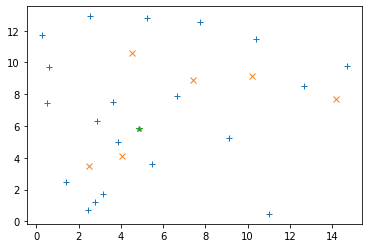

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 3.61309209321137 7.494182638253869
42.88979806721435 is min_value
stable_num 0
iteration 0
fitness is
42.88979806721435


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


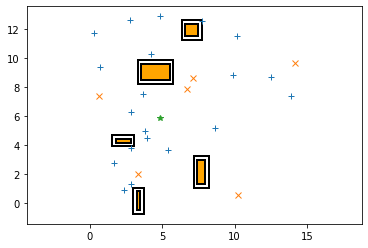

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 3.971130647497805 4.444377497010641
26.620893136309093 is min_value
stable_num 0
iteration 1
fitness is
26.620893136309093


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


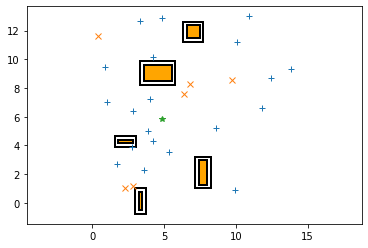

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.237626574079958 10.194944162305243
194.54158330385266 is min_value
stable_num 0
iteration 2
fitness is
194.54158330385266


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


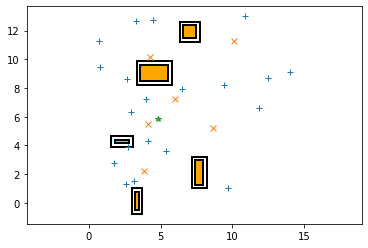

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 2.6423238071915547 8.621100569936958
126.43703578792397 is min_value
stable_num 0
iteration 3
fitness is
126.43703578792397


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


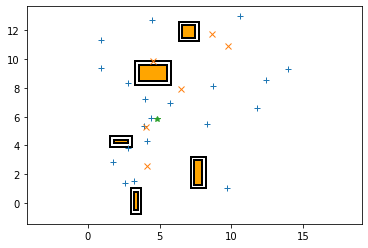

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 0.9500627135979668 11.316209577392298
452.7686930665129 is min_value
stable_num 0
iteration 4
fitness is
452.7686930665129


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


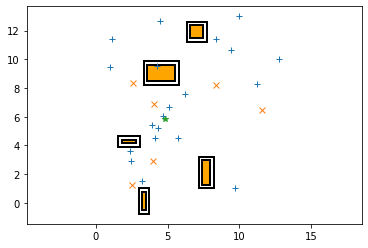

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 6.184129744319696 7.5694764856015855
48.487079138557185 is min_value
stable_num 0
iteration 5
fitness is
48.487079138557185


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


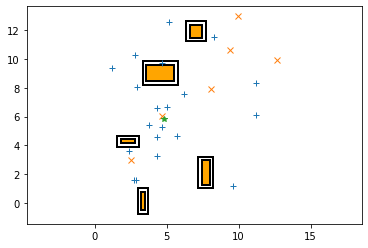

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.692153276246174 9.711305019929014
155.03398954227958 is min_value
stable_num 0
iteration 6
fitness is
155.03398954227958


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


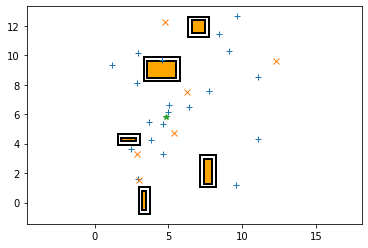

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.640495546900523 5.302062724130071
3.137290139922149 is min_value
stable_num 0
iteration 7
fitness is
3.137290139922149


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


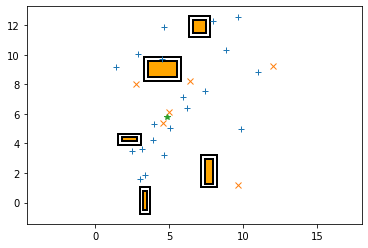

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 3.165542562160276 3.6493552245202827
75.38705264977635 is min_value
stable_num 0
iteration 8
fitness is
75.38705264977635


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


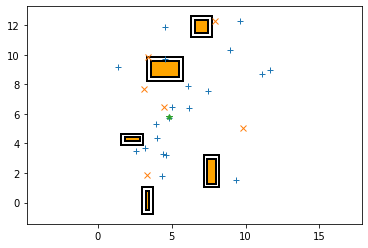

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.617541177926783 3.2296112377549573
67.8824851481511 is min_value
stable_num 0
iteration 9
fitness is
67.8824851481511


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


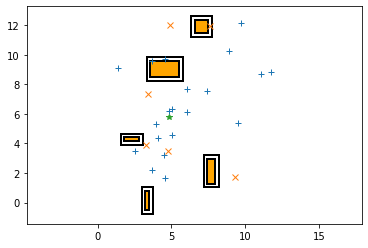

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 7.43113350005568 7.524485392844125
96.01777153878423 is min_value
stable_num 0
iteration 10
fitness is
96.01777153878423


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


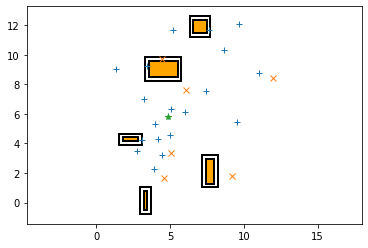

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 3.2341612286485675 7.041302325039543
40.559044331839104 is min_value
stable_num 0
iteration 11
fitness is
40.559044331839104


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


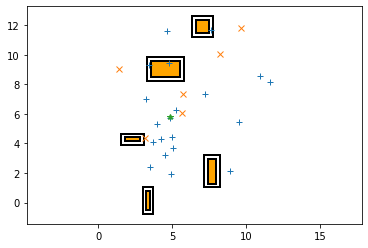

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 3.3953580640488004 9.335619920371672
145.90677482163662 is min_value
stable_num 0
iteration 12
fitness is
145.90677482163662


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


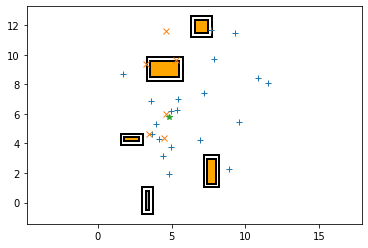

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 3.6791087842990122 4.634972119935768
27.645040326273982 is min_value
stable_num 0
iteration 13
fitness is
27.645040326273982


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


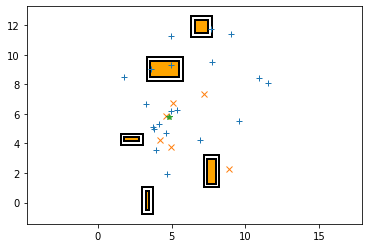

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 9.544132562458891 5.503664563984442
222.35035121221648 is min_value
stable_num 0
iteration 14
fitness is
222.35035121221648


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


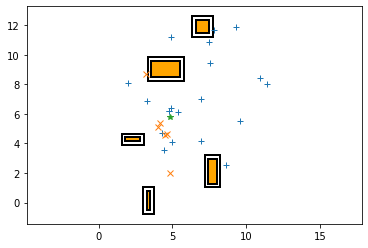

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.757812403282598 6.180682553673766
1.3283144619348115 is min_value
stable_num 0
iteration 15
fitness is
1.3283144619348115


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


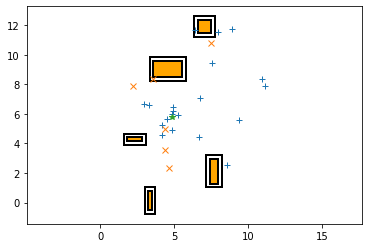

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 10.940714757964287 8.348476556668114
435.8721967496394 is min_value
stable_num 0
iteration 16
fitness is
435.8721967496394


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


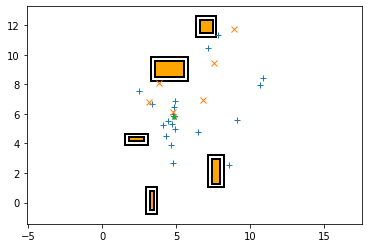

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 7.818888125720373 11.312395512557336
390.11206567566734 is min_value
stable_num 0
iteration 17
fitness is
390.11206567566734


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


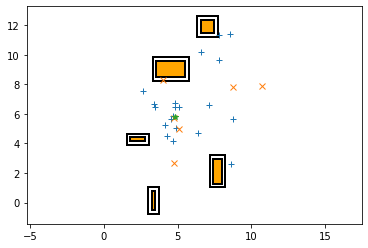

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.7136400624567205 5.89220342404341
0.20341141785461836 is min_value
stable_num 0
iteration 18
fitness is
0.20341141785461836


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


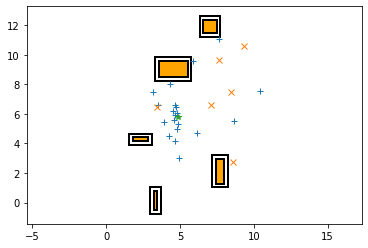

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 7.672010867673261 11.083431642521946
356.7873229073888 is min_value
stable_num 0
iteration 19
fitness is
356.7873229073888


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


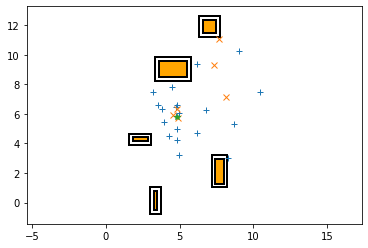

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 6.18077239188948 4.678850516729026
31.133138797997553 is min_value
stable_num 0
iteration 20
fitness is
31.133138797997553


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


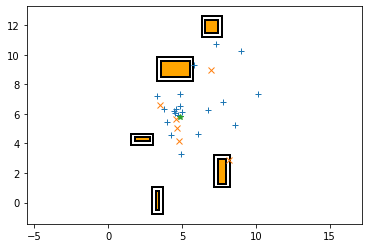

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 6.107671184120653 4.66863302762653
29.46130776960434 is min_value
stable_num 0
iteration 21
fitness is
29.46130776960434


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


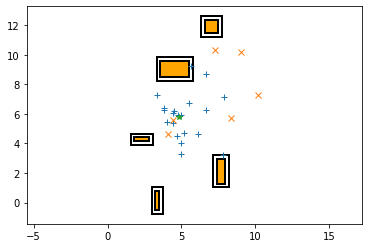

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 3.3674998276273755 7.307766231844536
43.64428614526119 is min_value
stable_num 0
iteration 22
fitness is
43.64428614526119


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


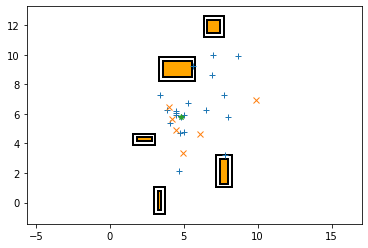

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 5.006353415134728 4.756661660719089
11.702797596058247 is min_value
stable_num 0
iteration 23
fitness is
11.702797596058247


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


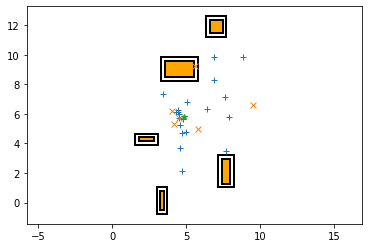

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 5.0534544915088535 6.808303397201909
10.114896367057046 is min_value
stable_num 0
iteration 24
fitness is
10.114896367057046


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


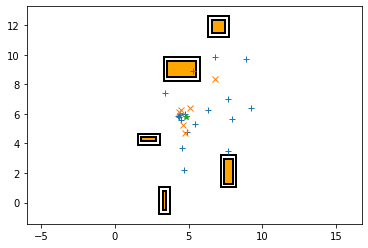

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 7.693014944962327 7.025331404512083
95.80732149539956 is min_value
stable_num 0
iteration 25
fitness is
95.80732149539956


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


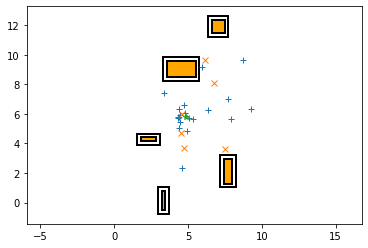

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 6.33155253590861 6.281111075887762
24.330806674637184 is min_value
stable_num 0
iteration 26
fitness is
24.330806674637184


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


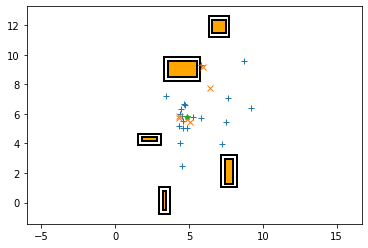

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.438114151653396 6.339942610578716
4.2589627792094715 is min_value
stable_num 0
iteration 27
fitness is
4.2589627792094715


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


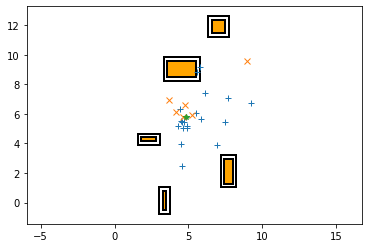

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 5.606000590993798 8.862179939937958
103.18771923434525 is min_value
stable_num 0
iteration 28
fitness is
103.18771923434525


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


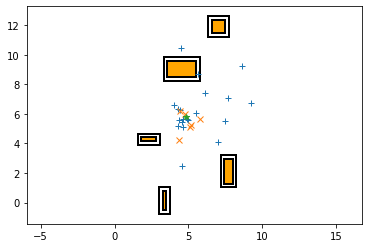

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.280121080820817 5.164944624942548
7.495546657023614 is min_value
stable_num 0
iteration 29
fitness is
7.495546657023614


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


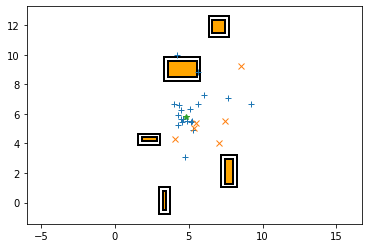

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 5.125451935440935 5.468847946811829
2.0887256190850465 is min_value
stable_num 0
iteration 30
fitness is
2.0887256190850465


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


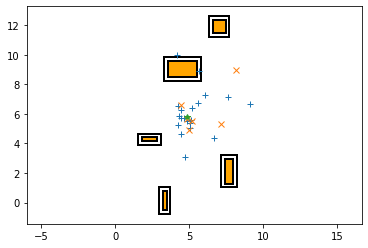

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.479984603895857 5.7303438992744
1.3847856111214638 is min_value
stable_num 0
iteration 31
fitness is
1.3847856111214638


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


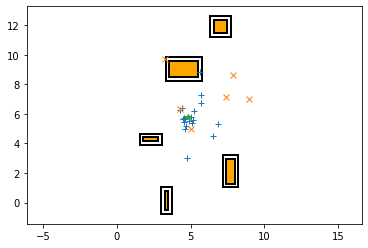

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 3.5547046579868606 4.668053243509759
29.910751966711043 is min_value
stable_num 0
iteration 32
fitness is
29.910751966711043


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


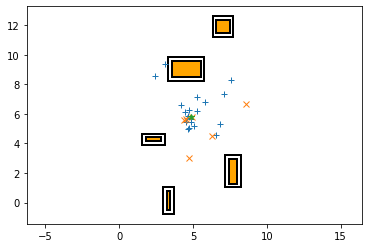

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 7.546505493999936 8.304154082210689
134.7014082884133 is min_value
stable_num 0
iteration 33
fitness is
134.7014082884133


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


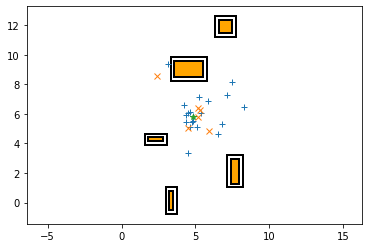

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 5.2459945196170965 7.16509905431422
19.594529683205863 is min_value
stable_num 0
iteration 34
fitness is
19.594529683205863


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


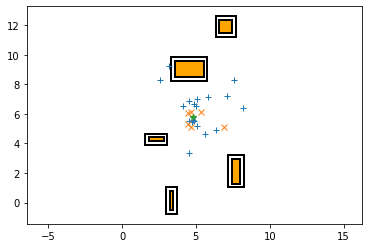

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.867175483748849 5.523064421442014
0.9224901631225477 is min_value
stable_num 0
iteration 35
fitness is
0.9224901631225477


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


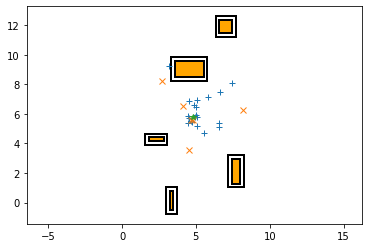

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 6.89947299549244 9.063584277392415
147.27437793638467 is min_value
stable_num 0
iteration 36
fitness is
147.27437793638467


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


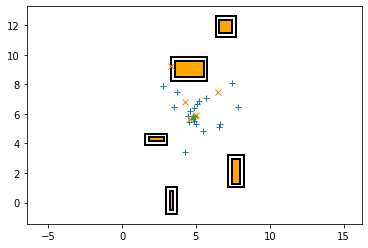

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 5.21091817170602 6.8652526409950525
12.18770621559443 is min_value
stable_num 0
iteration 37
fitness is
12.18770621559443


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


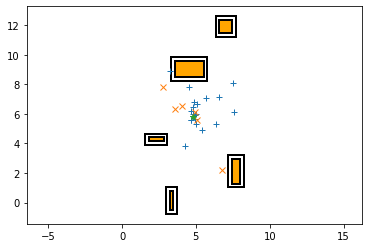

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 7.930351967036957 7.273234513368999
116.4775908706223 is min_value
stable_num 0
iteration 38
fitness is
116.4775908706223


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


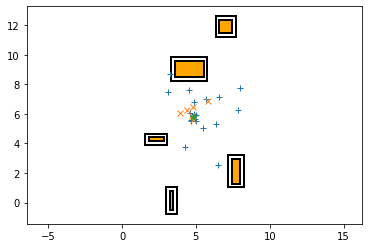

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 9.95624676394463 5.324208114800014
264.3010982520484 is min_value
stable_num 0
iteration 39
fitness is
264.3010982520484


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


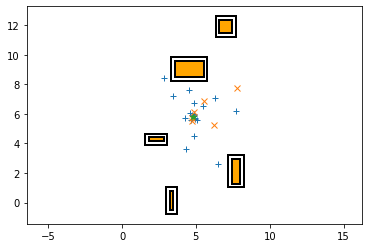

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 6.492096929591458 2.5813882808737505
132.5488958244258 is min_value
stable_num 0
iteration 40
fitness is
132.5488958244258


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


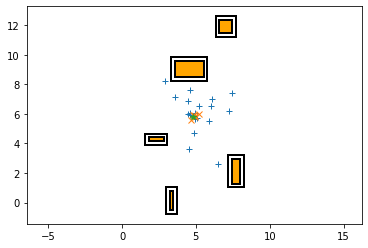

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 5.201736491024019 6.52009053225013
6.134414174206259 is min_value
stable_num 0
iteration 41
fitness is
6.134414174206259


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


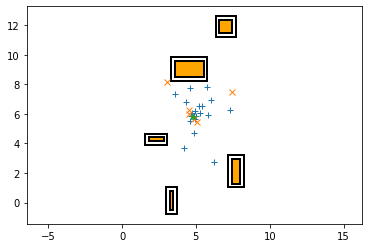

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.355485982936308 6.796210647370618
11.76678045531953 is min_value
stable_num 0
iteration 42
fitness is
11.76678045531953


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


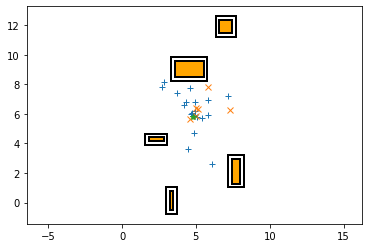

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 7.144019033996852 7.1880570035275175
71.66193327527252 is min_value
stable_num 0
iteration 43
fitness is
71.66193327527252


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


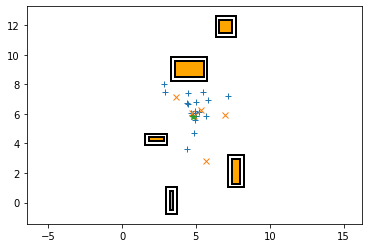

targets_location is  [[4.83972751]
 [5.82554686]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Start evaluating
best cat is in 4.999167552884567 6.808038903625912
9.907117455938932 is min_value
stable_num 0
iteration 44
fitness is
9.907117455938932


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


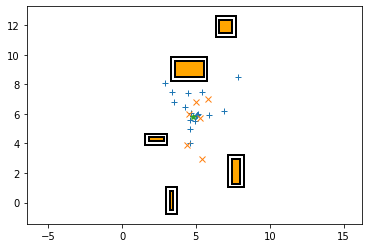

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 5.8830230834875845 5.935820687430434
11.006259735376036 is min_value
stable_num 0
iteration 45
fitness is
11.006259735376036


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


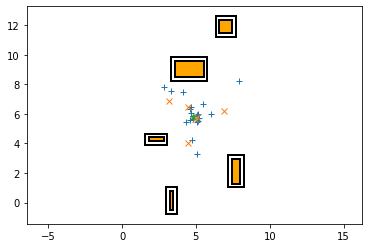

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.747077760413835 4.207618831089318
26.262750790931065 is min_value
stable_num 0
iteration 46
fitness is
26.262750790931065


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


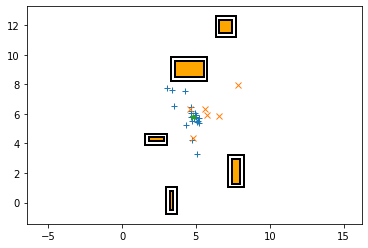

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 5.000590719159236 5.776153401582475
0.28316686092914944 is min_value
stable_num 0
iteration 47
fitness is
0.28316686092914944


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


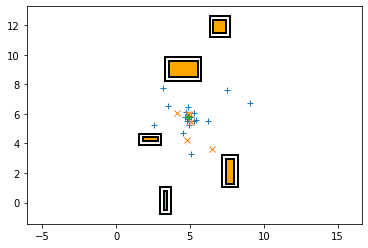

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 5.2714883763869445 6.062451668602802
2.4254133568162866 is min_value
stable_num 0
iteration 48
fitness is
2.4254133568162866


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


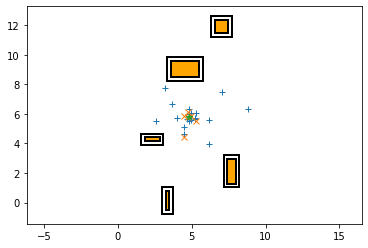

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 2.599568240063576 5.519314003614636
51.120921107147964 is min_value
stable_num 0
iteration 49
fitness is
51.120921107147964


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


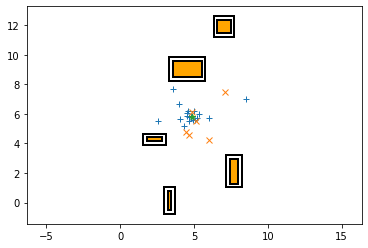

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.618213723550061 6.184002050655771
1.775584815154049 is min_value
stable_num 0
iteration 50
fitness is
1.775584815154049


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


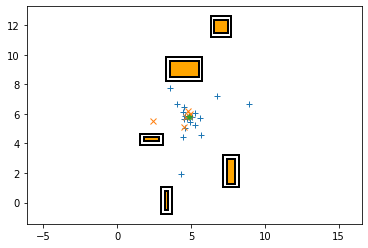

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.896648587985767 5.784884416972092
0.048934434470601355 is min_value
stable_num 0
iteration 51
fitness is
0.048934434470601355


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


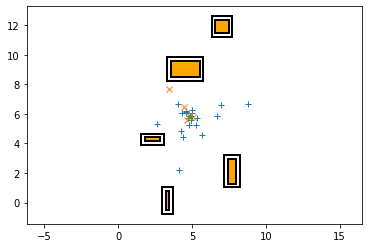

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 10.10881669925624 6.953045950835272
290.3455509986578 is min_value
stable_num 0
iteration 52
fitness is
290.3455509986578


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


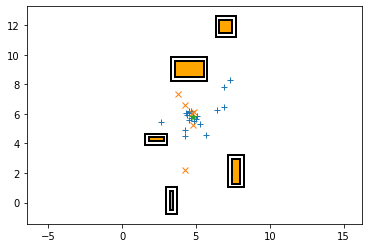

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.248174118933357 4.935780306197087
11.416199313324567 is min_value
stable_num 0
iteration 53
fitness is
11.416199313324567


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


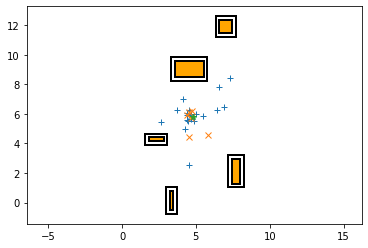

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.370402051414677 6.071777349891127
2.8089583958185207 is min_value
stable_num 0
iteration 54
fitness is
2.8089583958185207


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


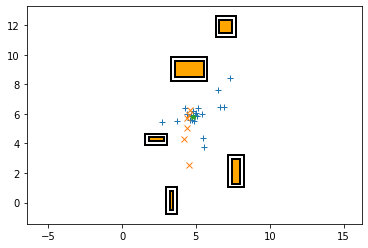

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.667830947165271 5.951676541975807
0.454571248308396 is min_value
stable_num 0
iteration 55
fitness is
0.454571248308396


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


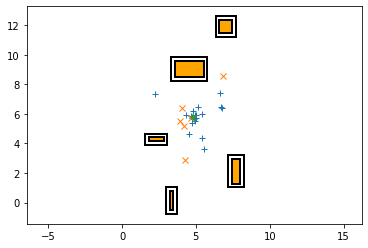

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.9807806704802555 5.962647215456977
0.3869250219979539 is min_value
stable_num 0
iteration 56
fitness is
0.3869250219979539


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


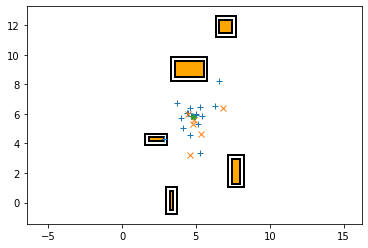

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.095840037951827 5.057125535479348
11.438398995119446 is min_value
stable_num 0
iteration 57
fitness is
11.438398995119446


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


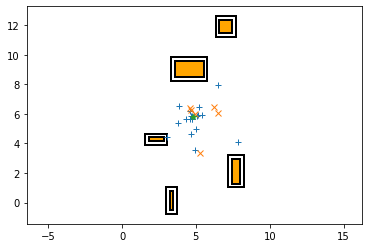

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.7646619079036325 5.842956275974807
0.059379322316403804 is min_value
stable_num 0
iteration 58
fitness is
0.059379322316403804


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


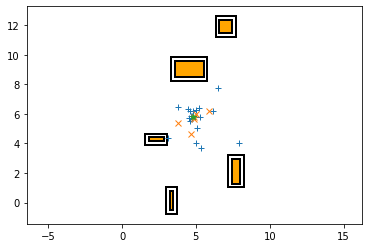

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 3.7773523194869703 6.44383302949777
15.109188314784387 is min_value
stable_num 0
iteration 59
fitness is
15.109188314784387


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


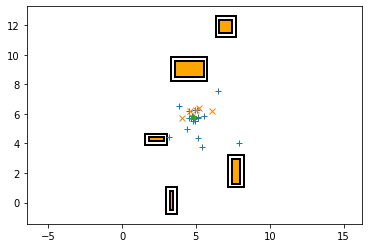

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 5.399755849666138 6.067795162745644
3.7231598334579323 is min_value
stable_num 0
iteration 60
fitness is
3.7231598334579323


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


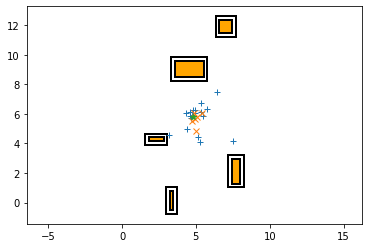

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 5.345466686035734 6.750100314172215
11.105712070749824 is min_value
stable_num 0
iteration 61
fitness is
11.105712070749824


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


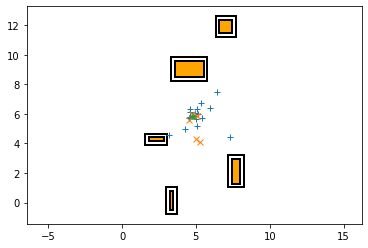

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 5.022645808407773 5.682330791160963
0.5396994641565542 is min_value
stable_num 0
iteration 62
fitness is
0.5396994641565542


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


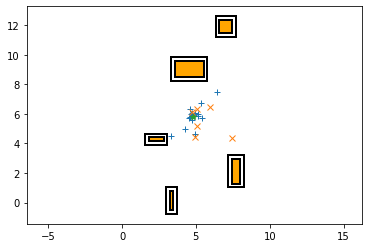

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.767655188221542 6.022743602900839
0.44080975223444985 is min_value
stable_num 0
iteration 63
fitness is
0.44080975223444985


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


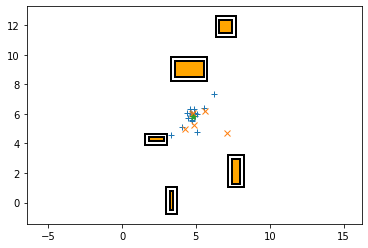

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 3.341894912320816 4.545687274465637
38.815430428136196 is min_value
stable_num 0
iteration 64
fitness is
38.815430428136196


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


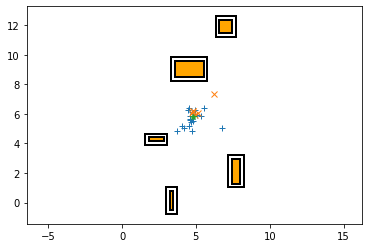

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.542066376381608 5.190677847503865
4.9166081137009385 is min_value
stable_num 0
iteration 65
fitness is
4.9166081137009385


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


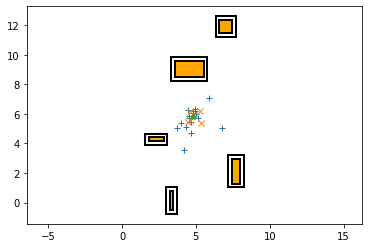

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.6702767693044285 4.743473804334693
11.995956485474624 is min_value
stable_num 0
iteration 66
fitness is
11.995956485474624


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


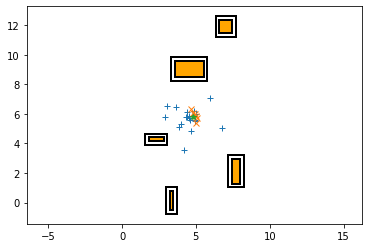

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.577028134826546 5.620073551675487
1.1123024104432901 is min_value
stable_num 0
iteration 67
fitness is
1.1123024104432901


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


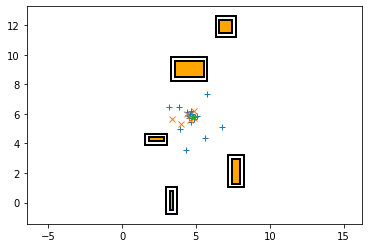

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.715063479967599 5.971518858508069
0.36848944735275313 is min_value
stable_num 0
iteration 68
fitness is
0.36848944735275313


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


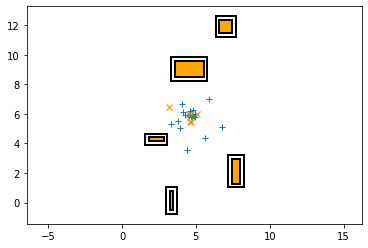

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 3.9213107270663645 5.021946445035434
14.892630100538891 is min_value
stable_num 0
iteration 69
fitness is
14.892630100538891


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


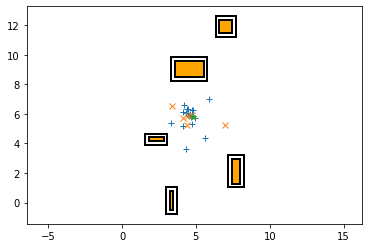

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.1324496821737355 6.150787256302538
6.060232400480501 is min_value
stable_num 0
iteration 70
fitness is
6.060232400480501


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


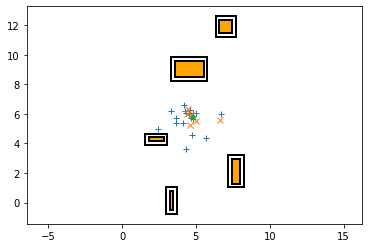

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


best cat is in 4.533212363498771 6.095844174423533
1.670121730343432 is min_value
stable_num 0
iteration 71
fitness is
1.670121730343432


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


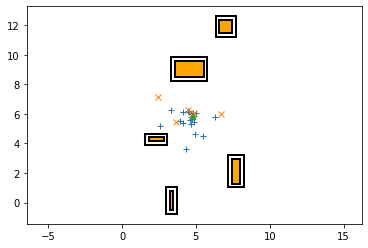

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 5.495451831540024 4.4819766409034765
22.351553182388088 is min_value
stable_num 0
iteration 72
fitness is
22.351553182388088


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


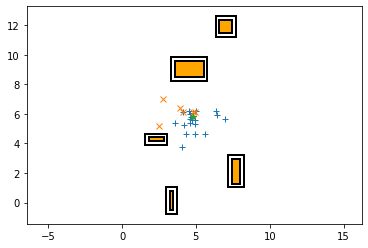

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.7729650874472895 6.037629360707182
0.49436208463146514 is min_value
stable_num 0
iteration 73
fitness is
0.49436208463146514


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


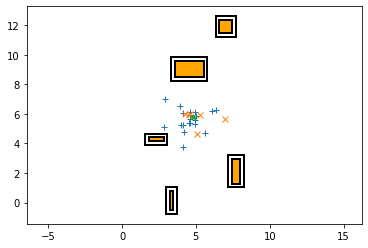

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 9.137752261145316 7.23262905465983
204.52897077844972 is min_value
stable_num 0
iteration 74
fitness is
204.52897077844972


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


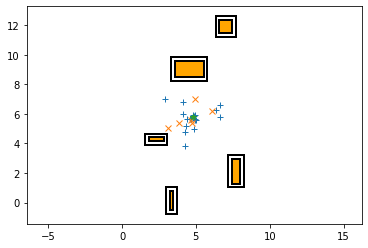

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 5.00528320510236 5.578059251942343
0.8865880420279276 is min_value
stable_num 0
iteration 75
fitness is
0.8865880420279276


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


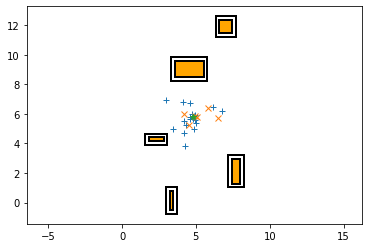

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.170896017864585 5.548239446335209
5.24234964262496 is min_value
stable_num 0
iteration 76
fitness is
5.24234964262496


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


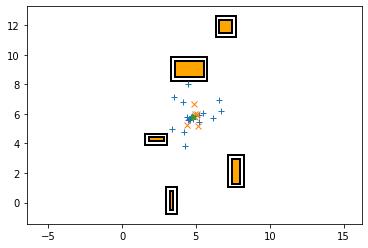

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 6.144959251470778 5.737229233980544
17.114299050994376 is min_value
stable_num 0
iteration 77
fitness is
17.114299050994376


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


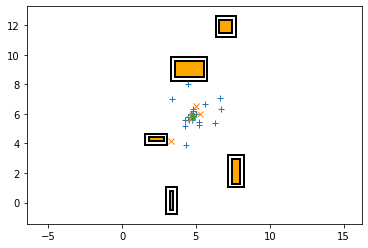

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.800771843958489 6.33480629165374
2.608627136509552 is min_value
stable_num 0
iteration 78
fitness is
2.608627136509552


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


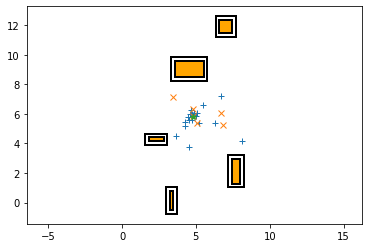

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.818398341199973 4.441652298096097
19.156190888554747 is min_value
stable_num 0
iteration 79
fitness is
19.156190888554747


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


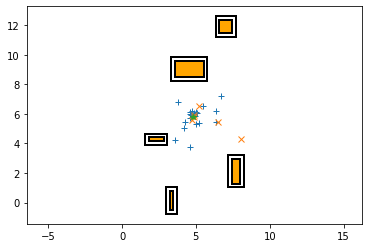

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.290462485720433 5.449062949620698
4.434321994739791 is min_value
stable_num 0
iteration 80
fitness is
4.434321994739791


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


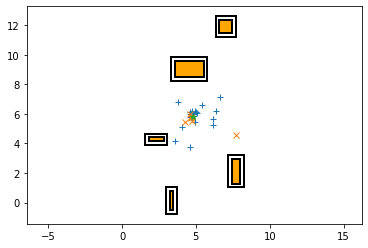

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 3.7796317160405484 6.790328024606982
20.5460578737635 is min_value
stable_num 0
iteration 81
fitness is
20.5460578737635


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


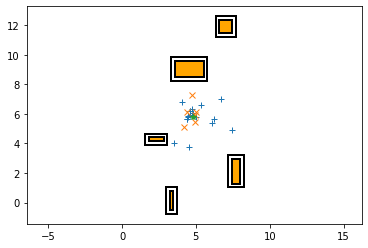

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.623818552538858 6.224263202442171
2.0559139996373688 is min_value
stable_num 0
iteration 82
fitness is
2.0559139996373688


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


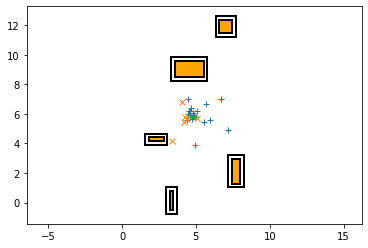

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 5.24545143065508 6.929787950267613
13.839602886410262 is min_value
stable_num 0
iteration 83
fitness is
13.839602886410262


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


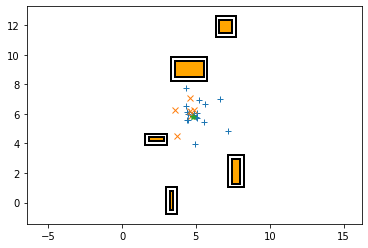

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.49045818810114 6.003590699750814
1.5368866760051372 is min_value
stable_num 0
iteration 84
fitness is
1.5368866760051372


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


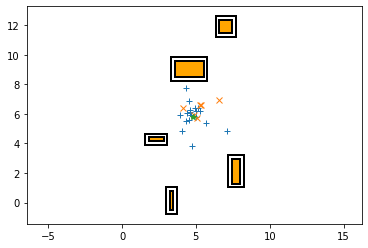

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.305806932114518 5.494214131018117
3.948525587232645 is min_value
stable_num 0
iteration 85
fitness is
3.948525587232645


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


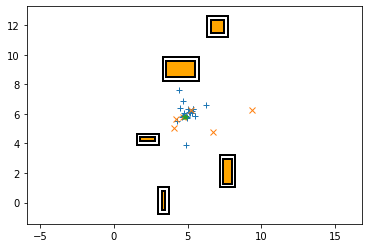

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.4754847434074145 6.425322017005931
4.924030323606285 is min_value
stable_num 0
iteration 86
fitness is
4.924030323606285


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


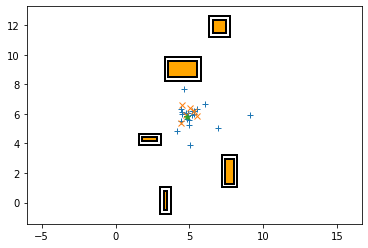

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 6.040619556184825 6.649835856373108
21.215940609384624 is min_value
stable_num 0
iteration 87
fitness is
21.215940609384624


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


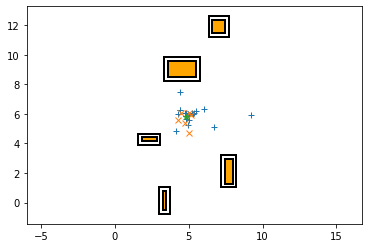

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 5.196939465370903 6.063692457035223
1.8431370786167824 is min_value
stable_num 0
iteration 88
fitness is
1.8431370786167824


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


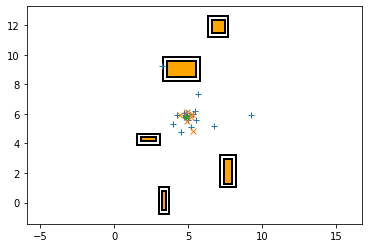

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 5.636399510056805 7.343736525054936
29.395861400484456 is min_value
stable_num 0
iteration 89
fitness is
29.395861400484456


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


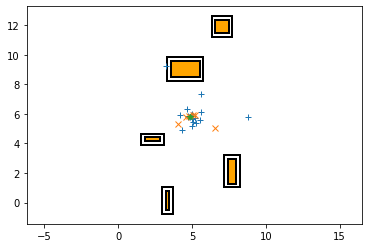

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.2166475819870115 5.926554776365264
3.9843119451318367 is min_value
stable_num 0
iteration 90
fitness is
3.9843119451318367


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


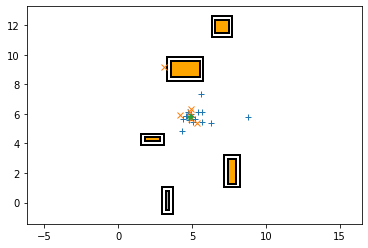

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.808802403961261 7.534542337281733
29.216219071796438 is min_value
stable_num 0
iteration 91
fitness is
29.216219071796438


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


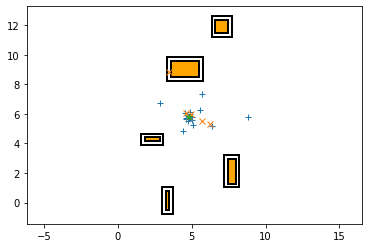

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.903257698185076 5.988983286193421
0.30747550731742407 is min_value
stable_num 0
iteration 92
fitness is
0.30747550731742407


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


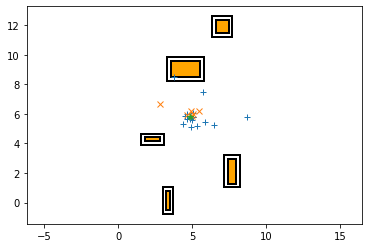

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.942343255620437 5.867276078961379
0.12271319312871497 is min_value
stable_num 0
iteration 93
fitness is
0.12271319312871497


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


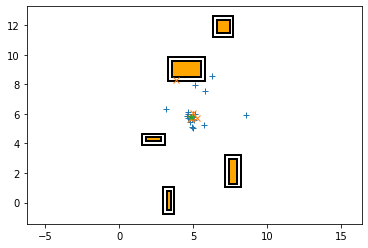

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.948126553752477 5.147210781674125
4.718901866471871 is min_value
stable_num 0
iteration 94
fitness is
4.718901866471871


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


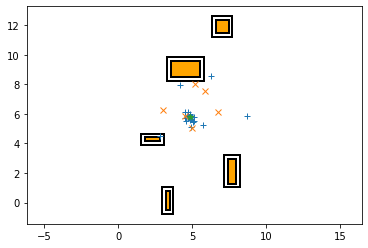

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 4.840737726200068 5.758146883167567
0.04543777270225001 is min_value
stable_num 0
iteration 95
fitness is
0.04543777270225001


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


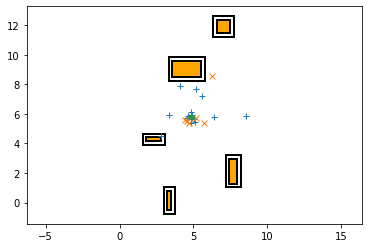

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 8.56456482153143 5.842778919341868
138.74709950650228 is min_value
stable_num 0
iteration 96
fitness is
138.74709950650228


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


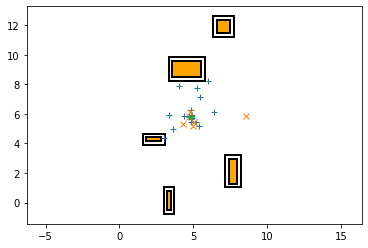

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 3.361832122930718 5.941840311165482
21.976989384401904 is min_value
stable_num 0
iteration 97
fitness is
21.976989384401904


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


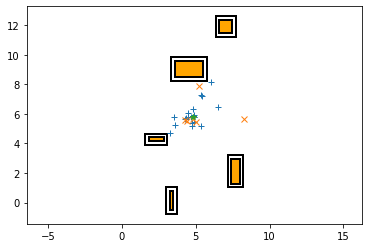

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 5.782941255549941 11.676129130523954
351.1896508901747 is min_value
stable_num 0
iteration 98
fitness is
351.1896508901747


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


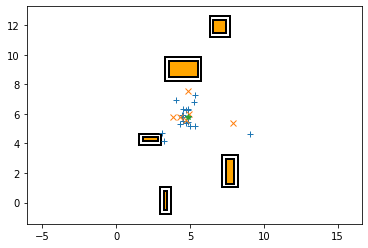

targets_location is  [[4.83972751]
 [5.82554686]]
Start evaluating
best cat is in 5.367957744581969 5.200599526291961
6.69586350609014 is min_value
stable_num 0
iteration 99
fitness is
6.69586350609014


<Figure size 432x288 with 0 Axes>

In [713]:
#def main():
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches


generate_block()
initiate_targets()
plot_block(block_parameters) 
plot_danger_area(block_influence_range_parameters) 
plt.show()
last_min_value = 100
cats = initiate_all(block_parameters)
stable_num = 0

for i in range(iteration):
  plot_block(block_parameters) 
  plot_danger_area(block_influence_range_parameters)
  plt.plot(cats[0,:],cats[1,0:],'+')
  plt.plot(tracing_position[0,:],tracing_position[1,:],'x',)
  plt.plot(targets_location[0,:],targets_location[1,:],'*',)
  plt.show()
  fig = plt.figure()
  print('targets_location is ',targets_location)
  candidates = generate_candidate(cats,block_parameters)
  new_group_index = evaluate(candidates,cats)
  #print('new_group_index',new_group_index)
  new_cats= next_group(cats,candidates,new_group_index)
  #print(new_cats)
  trace_update(new_cats, cats, tracing_velocity,tracing_position,block_parameters)
  cats = new_cats
  total = np.hstack((cats,tracing_position))
  total_index = np.arange(seeking_group + tracing_group_size)
  np.random.shuffle(total_index)
  cats = total[:,total_index[0:seeking_group]]
  #print("cats",cats)
  tracing_position = total[:,total_index[seeking_group:seeking_group+tracing_group_size]]

  print("stable_num",stable_num)
  print("iteration",i)
  print("fitness is")
  print(min_value)  
#if __name__ == "__main__":
#    main()